In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # For saving and loading objects
import streamlit as st
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve, classification_report
)
from tensorflow.keras.models import Sequential  # For building neural network models
from tensorflow.keras.layers import Dense, Dropout  # For adding layers to the neural network
from tensorflow.keras.optimizers import Adam  # Optimizer for training the neural network
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")


### Step 2: Dataset Acquisition and Preparation

##### loads the breast cancer dataset, a built-in dataset available in the sklearn.datasets module, commonly used for classification tasks. It retrieves the data and its corresponding features and labels using the load_breast_cancer() function. The features (input variables) are stored in a DataFrame X, with column names assigned from the dataset's feature names for easier interpretability. The labels (target variable), indicating whether a tumor is malignant or benign, are stored as a Series y. This setup is a preparatory step for further data analysis, modeling, or machine learning tasks.

In [124]:
# Load the dataset
data = load_breast_cancer()
feature_names = data.feature_names

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [125]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Step 3: Feature Selection

##### Prepares a dataset for machine learning by splitting it into training and testing sets, standardizing the features using StandardScaler, and saving the scaler for reuse. It then performs feature selection with SelectKBest to retain the top 10 features based on the f_classif scoring function. The feature selector is also saved using pickle. Finally, it visualizes the importance scores of the selected features using a bar plot, helping to understand which features contribute most to the model.

Selected Features:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


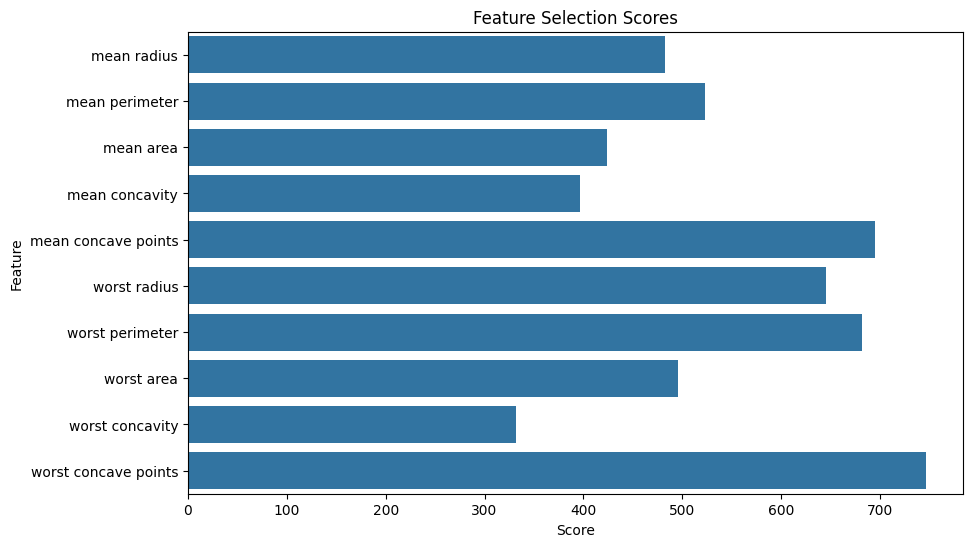

In [126]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler using pickle
with open("..\model\scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Save the feature selector using pickle
with open("..\model\\feature_selector.pkl", "wb") as f:
    pickle.dump(selector, f)

selected_features = X.columns[selector.get_support()]
print(f"Selected Features:\n{selected_features}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=selector.scores_[selector.get_support()], y=selected_features)
plt.title("Feature Selection Scores")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

### Step 4: Grid Search CV for Model Tuning

##### Performs hyperparameter optimization for a Multi-Layer Perceptron (MLP) classifier using GridSearchCV. It defines a grid of potential parameter values, including the number and size of hidden layers, activation functions, learning rate, and optimization solver. The grid search evaluates these combinations using 3-fold cross-validation based on accuracy. Once the best parameters are identified, the optimal MLP model is trained on the selected features of the training dataset (X_train_selected and y_train). Finally, the model is used to make predictions (y_pred) and predict probabilities (y_pred_prob) on the test dataset (X_test_selected).

In [127]:
# Hyperparameter optimization using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 30), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200]
}

mlp = MLPClassifier(max_iter=200, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train_selected, y_train)

best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")

# Evaluate the model
y_pred = best_model.predict(X_test_selected)
y_pred_prob = best_model.predict_proba(X_test_selected)[:, 1]


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}


In [128]:
X_train_selected

array([[-1.44075296, -1.36208497, -1.1391179 , ..., -0.97396758,
         4.67282796,  0.9320124 ],
       [ 1.97409619,  2.09167167,  1.85197292, ...,  2.1374055 ,
         1.92862053,  2.6989469 ],
       [-1.39998202, -1.34520926, -1.10978518, ..., -0.99971493,
        -0.64491059, -0.97023893],
       ...,
       [ 0.04880192, -0.06512547, -0.06142266, ..., -0.33927781,
        -1.12796759, -1.23903365],
       [-0.03896885, -0.03137406, -0.15477966, ..., -0.01355621,
         0.63253231,  1.05001236],
       [-0.54860557, -0.60350155, -0.5518995 , ..., -0.58052694,
        -0.76538799, -0.61102866]])

##### Evaluates the performance of a classification model using various metrics and visualizations. It calculates the accuracy, precision, recall, F1 score, and ROC AUC based on the model's predictions (y_pred) and predicted probabilities (y_pred_prob) against the true labels (y_test). It displays these metrics in a formatted output. A confusion matrix is computed, visualized using a heatmap to show the distribution of predictions across actual and predicted classes. Finally, the ROC curve is plotted to illustrate the model's trade-off between true positive rate (TPR) and false positive rate (FPR), along with the area under the curve (AUC), which indicates the model's discriminatory power.

Accuracy: 0.9825
Precision: 0.9859
Recall: 0.9859
F1 Score: 0.9859
ROC AUC: 0.9980


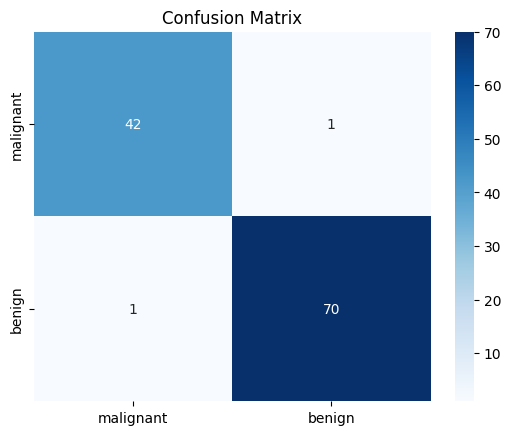

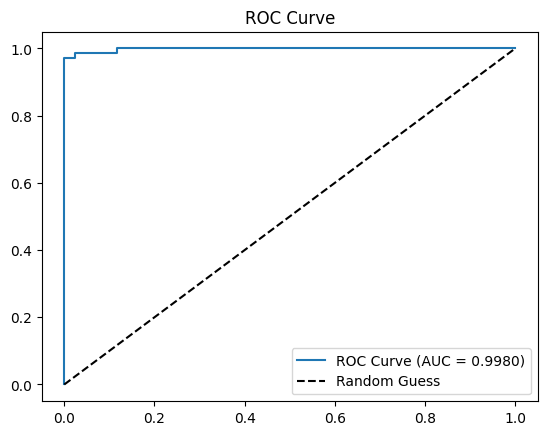

In [129]:
# Metrics and visualizations
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.legend()
plt.show()



In [130]:
# Save the ANN model
with open("..\model\\ann_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

### Step 5: Implementing an Artificial Neural Network (ANN) Model

##### Defines, compiles, and trains a binary classification neural network using Keras. The model consists of three dense layers: an input layer with 32 neurons, a hidden layer with 16 neurons, and an output layer with 1 neuron using a sigmoid activation for binary classification. Dropout layers (30% and 20%) are added for regularization to prevent overfitting. The model is compiled with the Adam optimizer (learning rate 0.001), binary cross-entropy loss for handling binary targets, and accuracy as the evaluation metric. During training, the model uses the training data for 50 epochs with a batch size of 32, holding back 20% of the data for validation to track performance.

In [131]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_selected.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout for regularization
    Dense(16, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
# Optimizer: Adam optimizer with a learning rate of 0.001 for efficient gradient descent
# Loss: Binary cross-entropy, suitable for binary classification tasks
# Metrics: Accuracy to evaluate model performance during training and validation
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summarize the model architecture
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [132]:
# Train the model
# Inputs: Training data (X_train, y_train)
# Epochs: Number of complete passes through the training data (50 in this case)
# Batch size: Number of samples per gradient update (32 in this case)
# Validation split: 20% of the training data is used for validation to monitor model performance
# Verbose: 1 for progress bar and detailed logs during training
history = model.fit(X_train_selected, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4278 - loss: 0.7630 - val_accuracy: 0.8242 - val_loss: 0.6099
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6626 - loss: 0.6321 - val_accuracy: 0.8571 - val_loss: 0.5045
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8409 - loss: 0.5156 - val_accuracy: 0.9121 - val_loss: 0.4107
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8842 - loss: 0.4267 - val_accuracy: 0.9121 - val_loss: 0.3353
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8753 - loss: 0.3591 - val_accuracy: 0.9121 - val_loss: 0.2810
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9239 - loss: 0.2947 - val_accuracy: 0.9341 - val_loss: 0.2410
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9110 - loss: 0.2788 - val_accuracy: 0.9341 - val_loss: 0.2135
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9479 - loss: 0.2326 - val_accuracy: 0.9341 - val_loss

##### Evaluates a trained model's performance on a test dataset. It uses the model to predict probabilities for the test inputs (X_test_selected) and converts these probabilities into binary class predictions (y_pred) based on a threshold of 0.5. It then calculates the accuracy score and prints a detailed classification report, which includes precision, recall, F1-score, and support for each class, comparing the predictions (y_pred) to the true labels (y_test).

In [133]:
# Evaluate on the test set
y_pred = (model.predict(X_test_selected) > 0.5).astype("int32")
y_pred_prob = model.predict(X_test_selected).flatten()

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



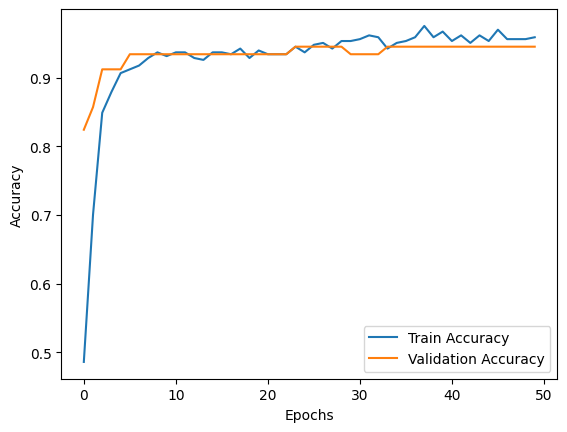

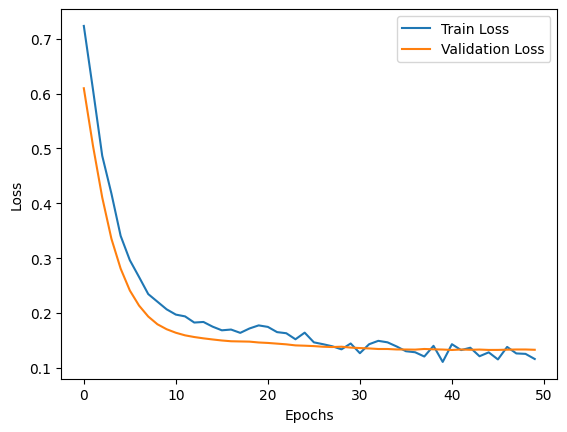

In [134]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [135]:
# Save the ANN model
with open("..\model\\custom_ann_model.pkl", "wb") as f:
    pickle.dump(model, f)